# Imports


In [4]:
import cv2
import numpy as np1
import glob

## Read images

In [2]:
img = cv2.imread('./SourceFiles/Images/doelpunten_cam_4/frame100.jpg')

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 3)


# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [27]:
for i in range(100):
    threshold_one = i * 10
    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=threshold_one, threshold2=10) 
    cv2.imwrite("./SourceFiles/Images/doelpunten_cam_4/canny/frame100_edge_%d.jpg" % threshold_one , edges)     # save frame as JPEG file    

In [5]:

kernel1 = np1.ones((5,5), np1.uint8)


In [7]:
path = "./SourceFiles/Images/doelpunten_cam_4/*.*"

count = 1
for file in glob.glob(path):
    img = cv2.imread(file)
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 3)
    img1_erosion1 = cv2.erode(img_blur, kernel1, iterations=1)
    img1_dilation1 = cv2.dilate(img1_erosion1, kernel1, iterations=1)
    edges = cv2.Canny(image=img1_dilation1, threshold1=100, threshold2=400) 

    # cv2.imwrite("./SourceFiles/Images/doelpunten_cam_4/result/frame100_1_blur.jpg" , img_blur)
    # cv2.imwrite("./SourceFiles/Images/doelpunten_cam_4/result/frame100_2_erosion.jpg" , img1_erosion1)
    # cv2.imwrite("./SourceFiles/Images/doelpunten_cam_4/result/frame100_3_dilation.jpg" , img1_dilation1)
    cv2.imwrite("./SourceFiles/Images/doelpunten_cam_4/result/{filename}_canny.jpg".format(filename = file.split('\\')[-1].split('.')[0]) , edges)

    count += 1

frame166.jpg
frame167.jpg
frame168.jpg
frame169.jpg
frame170.jpg
frame171.jpg
frame172.jpg
frame173.jpg
frame174.jpg
frame175.jpg
frame176.jpg
frame177.jpg
frame178.jpg
frame179.jpg
frame180.jpg
frame181.jpg
frame182.jpg
frame183.jpg
frame184.jpg
frame185.jpg
frame186.jpg
frame187.jpg
frame188.jpg
frame189.jpg
frame190.jpg
frame191.jpg
frame192.jpg
frame193.jpg
frame194.jpg
frame195.jpg
frame196.jpg
frame197.jpg
frame198.jpg
frame199.jpg
frame200.jpg
frame201.jpg
frame202.jpg
frame203.jpg
frame204.jpg
frame205.jpg
frame206.jpg
frame207.jpg
frame208.jpg
frame209.jpg
frame210.jpg
frame211.jpg
frame212.jpg
frame213.jpg
frame214.jpg
frame215.jpg
frame216.jpg
frame217.jpg
frame218.jpg
frame219.jpg
frame220.jpg
frame221.jpg
frame222.jpg
frame223.jpg
frame224.jpg
frame225.jpg
frame226.jpg
frame227.jpg
frame228.jpg
frame229.jpg
frame230.jpg
frame231.jpg
frame232.jpg
frame233.jpg
frame234.jpg
frame235.jpg
frame236.jpg
frame237.jpg
frame238.jpg
frame239.jpg
frame240.jpg
frame241.jpg
frame242.jpg

In [2]:
## Reading the annotations file
import json
  
# Opening JSON file
f = open('./DestinationFiles/vott-json-export/DOELPUNTEN_CAM_4-export.json')
data = json.load(f)



In [104]:
# Iterating through the json
# list
import numpy as np

from PIL import Image
colors = data['tags']

for id in data['assets']:
    asset = data['assets'][id]
    img = cv2.imread('./DestinationFiles/vott-json-export/' + asset['asset']['name'])

    height = asset['asset']['size']['height']
    width = asset['asset']['size']['width']

    for region in asset['regions']:
        points = [[point['x'], point['y']] for point in region['points']]
        color = [color['color'] for color in colors if color['name'] == region['tags'][0]][0]
        h = color.lstrip('#')
        color = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
        pts = np.array(points, np.int32)
        i = cv2.fillPoly(img, [pts], color)
        cv2.imwrite("./SourceFiles/Images/dataset/cam4/{filename}".format(filename = asset['asset']['name']) , i)

In [52]:
f.close()

In [78]:
import os
from skimage.io import imread, imshow
import matplotlib.pyplot as plt


training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "./SourceFiles/Images/dataset/cam4/X/"
pathy = "./SourceFiles/Images/dataset/cam4/y/"
valid_images = ['.jpg', ".gif", ".png"]

percentage_train = 70
current = 0
total_items = len(os.listdir(path))
print(total_items)
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue

    if (current * 100.0 / total_items) > percentage_train:
        test_images.append(imread(os.path.join(path,f), as_gray=True))
        y_test.append(imread(os.path.join(pathy,f), as_gray=True))

    else:
        training_images.append(imread(os.path.join(path,f), as_gray=True))
        y_train.append(imread(os.path.join(pathy,f), as_gray=True))
    current += 1

print("aantal training images: ", len(y_train))
print("aantal test images: ", len(y_test))


146
aantal training images:  103
aantal test images:  43


label van het cijfer:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-0.5, 1919.5, 1079.5, -0.5)

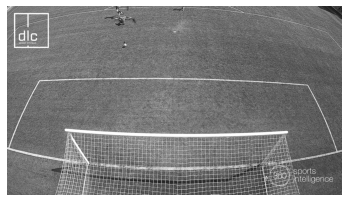

In [86]:
image_index = 8
print('label van het cijfer: ',y_train[image_index])
plt.imshow(training_images[image_index],cmap = 'gray')
plt.axis('off')

In [87]:
from skimage import transform
training_images = [transform.resize(i, (1080, 1920), mode='constant') for i in training_images]
test_images = [transform.resize(i, (1080, 1920), mode='constant') for i in test_images]

label van het cijfer:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-0.5, 1919.5, 1079.5, -0.5)

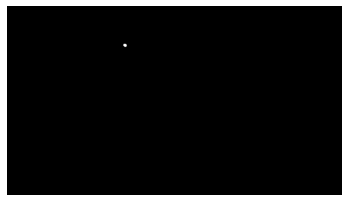

In [89]:

print('label van het cijfer: ',y_train[image_index])
plt.imshow(y_train[image_index],cmap = 'gray')
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

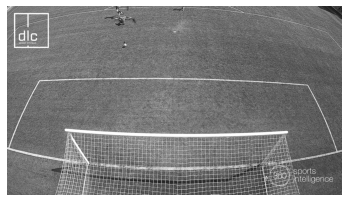

In [92]:
plt.imshow(training_images[image_index],cmap = 'gray')
plt.axis('off')

In [94]:
# Omzetten naar training en test set. Afbeeldingen naar 1 dimensie brengen (1 rij pixels per afbeelding)
X_train = [np.reshape(i, -1) for i in training_images]
X_test = [np.reshape(i, -1) for i in test_images]


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

temp_df = X_train.astype('float64')

from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(temp_df)
y_kmeans = est.predict(X_test)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [99]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [100]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)


print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

ValueError: y should be a 1d array, got an array of shape (103, 2073600) instead.